# Generating Final Annotations
#### ... and producing dataframes for analysis!!

## Imports

In [1]:
import os 
import pandas as pd
import numpy as np
import re
import altair as alt 
from tqdm import tqdm

In [2]:
# Altair related settings
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

## Set paths here

In [3]:
# Set Paths
PATH_parsed = '../data/parsed/'
PATH_annotated = '../data/annotated/'
PATH_processed = '../data/processed/'
PATH_df = '../data/dataframes/'
PATH_final = '../data/final/'

## Custom functions

In [4]:
# Exports from Ruby script must be re-formatted...
def convert_str_to_list(s):
    """Converts string representation of list into list"""
    return s.strip('[]').split(", ")

## Print annotation stats, produce data frames for analysis

In [5]:
print("STATS FOR ANNOTATED")
stats_annotated = {}
pre_filter_annotations = {}

for folder in os.listdir(PATH_annotated):
    if os.path.isdir(PATH_annotated + folder):
        print(f"Parsing files in {folder}...")
        annotator_df = pd.DataFrame()
        course_count = 0
        annotation_count = 0
        empty_courses = 0
        
        for file in os.listdir(PATH_annotated + folder):
            if file != '.DS_Store':
                fn = PATH_annotated + folder + '/' + file
                course_count += 1
                with open(fn, 'r') as f:
                    size = len(f.readlines())
                    annotation_count += size
                    if size > 0:
                        incoming_df = pd.read_csv(PATH_annotated + folder + '/' + file, delimiter='\t', header=None)
                        incoming_df = incoming_df.fillna("")
                        incoming_df.columns = ["category", "reading"]
                        incoming_df["course"] = file.split(".")[0]
                        annotator_df = pd.concat([annotator_df, incoming_df], ignore_index=True)
                    else:
                        empty_courses += 1
                        
        print(f"{annotation_count} annotations over {course_count} courses")
        print()
        
        stats_annotated[folder] = {'annotations': annotation_count, 'courses': course_count}
        pre_filter_annotations[folder] = annotator_df.drop_duplicates(ignore_index=True)


print("COMPLETE!!")

STATS FOR ANNOTATED
Parsing files in jessie...
4369 annotations over 108 courses

Parsing files in jinhong...
1341 annotations over 131 courses

Parsing files in jae...
5647 annotations over 102 courses

Parsing files in min...
1924 annotations over 180 courses

Parsing files in biya...
5229 annotations over 105 courses

COMPLETE!!


In [6]:
# Export data frames for analysis
pre_filter_annotations['jae'].to_csv(PATH_df + 'pre_filter_annotations_by_' + 'jae' + '.tsv', sep='\t', index=False)
pre_filter_annotations['biya'].to_csv(PATH_df + 'pre_filter_annotations_by_' + 'biya' + '.tsv', sep='\t', index=False)

pre_filter_annotations['jinhong'].to_csv(PATH_df + 'pre_filter_annotations_by_' + 'jinhong' + '.tsv', sep='\t', index=False)
pre_filter_annotations['min'].to_csv(PATH_df + 'pre_filter_annotations_by_' + 'min' + '.tsv', sep='\t', index=False)

In [7]:
print("STATS FOR PROCESSED")
stats_processed = {}
pre_parsing_annotations = {}

for folder in os.listdir(PATH_processed):
    if os.path.isdir(PATH_processed + folder):
        print(f"Parsing files in {folder}...")
        course_count = 0
        annotation_count = 0
        empty_courses = 0
        
        for file in os.listdir(PATH_processed + folder):
            if file != '.DS_Store':
                fn = PATH_processed + folder + '/' + file
                course_count += 1
                with open(fn, 'r') as f:
                    size = len(f.readlines())
                    annotation_count += size
                    if size > 0:
                        incoming_df = pd.read_csv(PATH_processed + folder + '/' + file, delimiter='\t', header=None)
                        incoming_df = incoming_df.fillna("")
                        incoming_df.columns = ["category", "reading"]
                        incoming_df["course"] = file.split(".")[0]
                        annotator_df = pd.concat([annotator_df, incoming_df], ignore_index=True)
                    else:
                        empty_courses += 1
        print(f"{annotation_count} annotations over {course_count} courses")
        print()
        
        stats_processed[folder] = {'annotations': annotation_count, 'courses': course_count}
        pre_parsing_annotations[folder] = annotator_df.drop_duplicates(ignore_index=True)

print("COMPLETE!!")

STATS FOR PROCESSED
Parsing files in jessie...
4095 annotations over 108 courses

Parsing files in jinhong...
1307 annotations over 133 courses

Parsing files in jae...
5255 annotations over 102 courses

Parsing files in min...
1869 annotations over 180 courses

Parsing files in biya...
5116 annotations over 105 courses

COMPLETE!!


In [8]:
annotations = {}

print("STATS FOR PARSED")
stats_parsed = {}

for folder in os.listdir(PATH_parsed):
    if os.path.isdir(PATH_parsed + folder):
        print(f"Parsing files in {folder}...")
        annotator_df = pd.DataFrame()
        course_count = 0
        annotation_count = 0
        empty_courses = 0
        
        for file in os.listdir(PATH_parsed + folder):
            if file != '.DS_Store':
                fn = PATH_parsed + folder + '/' + file
                course_count += 1
                with open(fn, 'r') as f:
                    size = len(f.readlines())
                    annotation_count += size
                    if size > 0:
                        incoming_df = pd.read_csv(PATH_parsed + folder + '/' + file, delimiter='\t', header=None)
                        incoming_df = incoming_df.fillna("")
                        incoming_df.columns = ["category", "author", "title", "type", "collection", "year"]
                        incoming_df["course"] = file.split(".")[0]
                        #incoming_df["author"] = incoming_df["author"].apply(convert_str_to_list_author)
                        incoming_df[["title", "type", "collection", "year"]] = incoming_df[["title", "type", "collection", "year"]].applymap(convert_str_to_list)
                        incoming_df[["title", "type", "collection", "year"]] = incoming_df[["title", "type", "collection", "year"]].applymap(lambda x: x[0])
                        incoming_df[["title", "type", "collection", "year"]] = incoming_df[["title", "type", "collection", "year"]].applymap(lambda x: x.strip("\""))

                        annotator_df = pd.concat([annotator_df, incoming_df], ignore_index=True)
                    else:
                        empty_courses += 1
                        
        print(f"{annotation_count} annotations over {course_count} courses")
        print()
        
        annotations[folder] = annotator_df.drop_duplicates(ignore_index=True)
        stats_parsed[folder] = {'annotations': annotation_count, 'courses': course_count}


print("COMPLETE!!")

STATS FOR PARSED
Parsing files in jessie...
3295 annotations over 96 courses

Parsing files in jinhong...
1200 annotations over 131 courses

Parsing files in jae...
3078 annotations over 86 courses

Parsing files in min...
1722 annotations over 177 courses

Parsing files in biya...
3125 annotations over 90 courses

COMPLETE!!


In [9]:
# Preview a dataframe, for annotator == biya
annotations['biya'].head()

,category,author,title,type,collection,year,course
0,Optional,"[{:family=>""Ott"", :given=>""E.""}, {:family=>""Sa...",Coping with Chaos,,,1994,1022
1,Optional,"[{:family=>""Wilks"", :given=>""D.""}]",Statistical Methods in the Atmospheric Sciences,,,1995,1022
2,Optional,"[{:family=>""Wunsch"", :given=>""C.""}]",The Ocean Circulation Inverse Problem,,,1996,1022
3,Optional,"[{:family=>""Kalnay"", :given=>""E.""}]",Atmospheric Modeling,,,2003,1022
4,Required,"[{:family=>""Grassberger"", :given=>""P.""}, {:fam...",Characterization of Strange Attractors,article-journal,Physical Review Letters,1983,1022


## Aggregate annotator stats

In [10]:
# Organize stats in table
stats_annotated_df = pd.DataFrame(stats_annotated).T
stats_processed_df = pd.DataFrame(stats_processed).T
stats_parsed_df = pd.DataFrame(stats_parsed).T

annotation_stats = pd.concat([stats_annotated_df, stats_processed_df, stats_parsed_df], keys=['annotated', 'processed','parsed']).reset_index().rename(columns={'level_0': 'batch', 'level_1': 'annotator'})
annotation_stats

,batch,annotator,annotations,courses
0,annotated,jessie,4369,108
1,annotated,jinhong,1341,131
2,annotated,jae,5647,102
3,annotated,min,1924,180
4,annotated,biya,5229,105
5,processed,jessie,4095,108
6,processed,jinhong,1307,133
7,processed,jae,5255,102
8,processed,min,1869,180
9,processed,biya,5116,105


In [11]:
stats_annotated_df_courses = stats_annotated_df.reset_index().rename(columns={'index': 'annotator'})

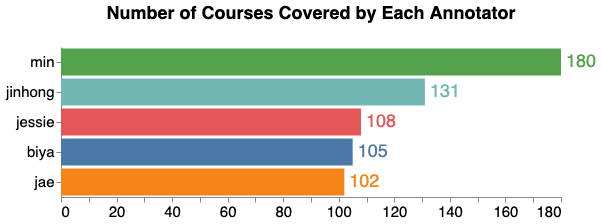

In [12]:
# Plot stats as bar chart
alt.themes.enable('default')

base = alt.Chart(stats_annotated_df_courses, title="Number of Courses Covered by Each Annotator").mark_bar().encode(
    x=alt.X('courses', title=None, stack=False),
    y=alt.Y('annotator', sort='-x', title=None),
    color=alt.Color('annotator', legend=None)
    ).properties(width=500, height=150)

text = base.mark_text(dx=5, size=18, align='left').encode(
    y=alt.Y('annotator', sort='-x'),
    x=alt.X('courses'),
    text=alt.Text('courses')
)

((base + text)
 .configure_axis(labelFontSize=15, titleFontSize=20, grid=False)
 .configure_view(strokeWidth=0)
 .configure_title(fontSize=18, dy=-20, align='center')
)

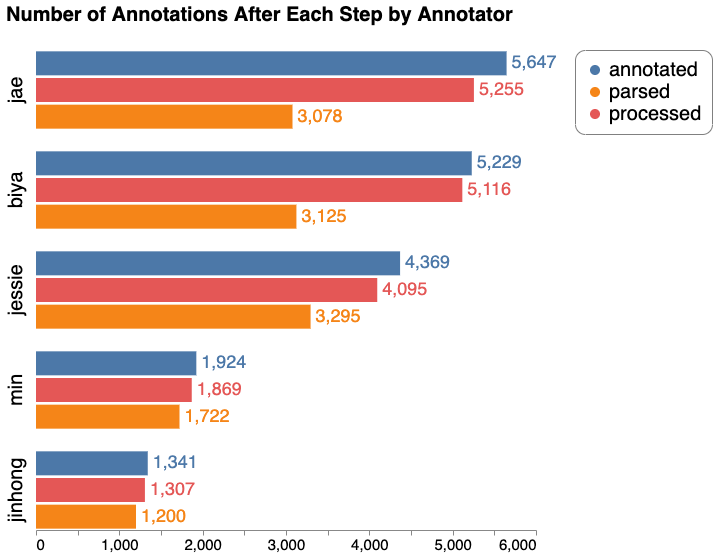

In [13]:
# Plot stats as bar chart
alt.themes.enable('default')

base = alt.Chart(annotation_stats).mark_bar().encode(
    x=alt.X('annotations', stack=False, title=None),
    y=alt.Y('batch', sort=['annotated', 'processed', 'parsed'], title=None, axis=None),
    color=alt.Color('batch', legend=alt.Legend(title=None))
    ).properties(width=500, height=80)

text = base.mark_text(dx=5, size=18, align='left').encode(
    y=alt.Y('batch', sort=['annotated', 'processed', 'parsed']),
    x=alt.X('annotations', stack=False),
    text=alt.Text('annotations', format=',')
)

((base + text).facet(
    title="Number of Annotations After Each Step by Annotator",
    row=alt.Row('annotator', sort= ['jae', 'biya', 'jessie', 'min', 'jinhong'], header=alt.Header(labelFontSize=20), title=None),
).configure_axis(labelFontSize=15, titleFontSize=20, grid=False)
 .configure_view(strokeWidth=0)
 .configure_title(fontSize=20, dy=-20, align='center')
 .configure_legend(
    strokeColor='gray',
    fillColor='#FFFFFF',
    padding=10,
    cornerRadius=10,
    orient='right',
    labelFontSize=20,
    titleFontSize=20
)
)

## Prepare data frames for interannotation agreement analysis

In [14]:
# Find set of unique courses, for each annotator
courses = {annotator: set(df["course"].value_counts().keys()) for annotator, df in annotations.items()}

In [15]:
# Match agreement partners, slice dataframe for matching courses 
for_agreement = {}

for_agreement["biya"] = annotations["biya"][annotations["biya"].course.isin(list(courses["biya"].intersection(courses["jae"])))]
for_agreement["jae"] = annotations["jae"][annotations["jae"].course.isin(list(courses["biya"].intersection(courses["jae"])))]

for_agreement["jinhong"] = annotations["jinhong"][annotations["jinhong"].course.isin(list(courses["jinhong"].intersection(courses["min"])))]
for_agreement["min"] = annotations["min"][annotations["min"].course.isin(list(courses["jinhong"].intersection(courses["min"])))]

In [16]:
for_agreement["biya"].head()

,category,author,title,type,collection,year,course
0,Optional,"[{:family=>""Ott"", :given=>""E.""}, {:family=>""Sa...",Coping with Chaos,,,1994,1022
1,Optional,"[{:family=>""Wilks"", :given=>""D.""}]",Statistical Methods in the Atmospheric Sciences,,,1995,1022
2,Optional,"[{:family=>""Wunsch"", :given=>""C.""}]",The Ocean Circulation Inverse Problem,,,1996,1022
3,Optional,"[{:family=>""Kalnay"", :given=>""E.""}]",Atmospheric Modeling,,,2003,1022
4,Required,"[{:family=>""Grassberger"", :given=>""P.""}, {:fam...",Characterization of Strange Attractors,article-journal,Physical Review Letters,1983,1022


In [17]:
# Export as tsv
for annotator, df in annotations.items():
    df.to_csv(PATH_df + 'annotations_by_' + annotator + '.tsv', sep='\t', index=False)

## Produce final version annotations

To produce the final version, we decided on the following rules on how to resolve conflicts in our interannotations:

- If both annotators agree on the category of the reading, we include it, as is. 
- If the annotators disagree on the category of the reading (one vote on "required, one vote on "optional"), we include the reading as "required". The rationale behind this is that it is better for a student to read the reading and find out that it was actually optional, than to not read the reading and find out later that it was actually requried. 
- If one person annotated a reading that is completely missed by the other, we include the reading. In such cases, the person who _did_ annotate gets the say of the category.

In [18]:
def decide_final(df, annotator1, annotator2):
    """Make final annotation decision"""
    # Agree
    if (df['_merge'] == 'both') and (df['category_'+annotator1] == df['category_'+annotator1]):
        return df['category_'+annotator1]
    # Disagree
    elif (df['_merge'] == 'both') and (df['category_'+annotator1] != df['category_'+annotator1]):
        return 'Required'
    # Unknowns
    elif (df['_merge'] == 'left_only'):
        return df['category_'+annotator1]
    elif (df['_merge'] == 'right_only'):
        return df['category_'+annotator2]

In [19]:
def produce_final_annotation_files(annotator1, annotator2):
    """Export final annotation tsv files"""
    merge_df = pd.merge(
        for_agreement[annotator1], 
        for_agreement[annotator2], 
        how='outer', 
        on=['author', 'title', 'type', 'collection', 'year', 'course'], 
        indicator=True, 
        suffixes=['_'+annotator1, '_'+annotator2]
    )
    
    courses = sorted(merge_df.course.value_counts().keys())

    # We will generate a .tsv file for each course, to look like our other annotations
    for c in tqdm(courses):
        slice_df = merge_df[merge_df.course==c].copy()
        decisions = []
        
        for row in slice_df.iterrows():
            decisions.append(decide_final(row[1], annotator1, annotator2))
        
        slice_df['category'] = decisions
        slice_df = slice_df.loc[:, ~slice_df.columns.isin(['course', 'category_'+annotator1, 'category_'+annotator2])]
        slice_df.to_csv(PATH_final + c + '.tsv', sep='\t', index=False)

In [20]:
produce_final_annotation_files('biya', 'jae')

100%|███████████████████████████████████████| 72/72 [00:00<00:00, 522.94it/s]


In [21]:
produce_final_annotation_files('min', 'jinhong')

100%|█████████████████████████████████████| 102/102 [00:00<00:00, 919.31it/s]
